## Wine Recommendation by taster

Analizing the database of wine reviews: [Wine Reviews](https://www.kaggle.com/zynicide/wine-reviews) 


inspired by [wine-recommender](https://www.kaggle.com/sudhirnl7/wine-recommender/notebook)

### Import and read csv

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS


%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size':12})

In [13]:
path = '2-Data/wine_130k.csv'

wines = pd.read_csv(path, low_memory=False)

In [14]:
print(wines.shape)
wines.head()

(120915, 14)


,Unnamed: 0,Index_P,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
1,2,2,US,"Tart and snappy, the flavors of lime flesh and...",Unknown,87,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
2,3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,Unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
3,4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
4,5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


## Taster Name

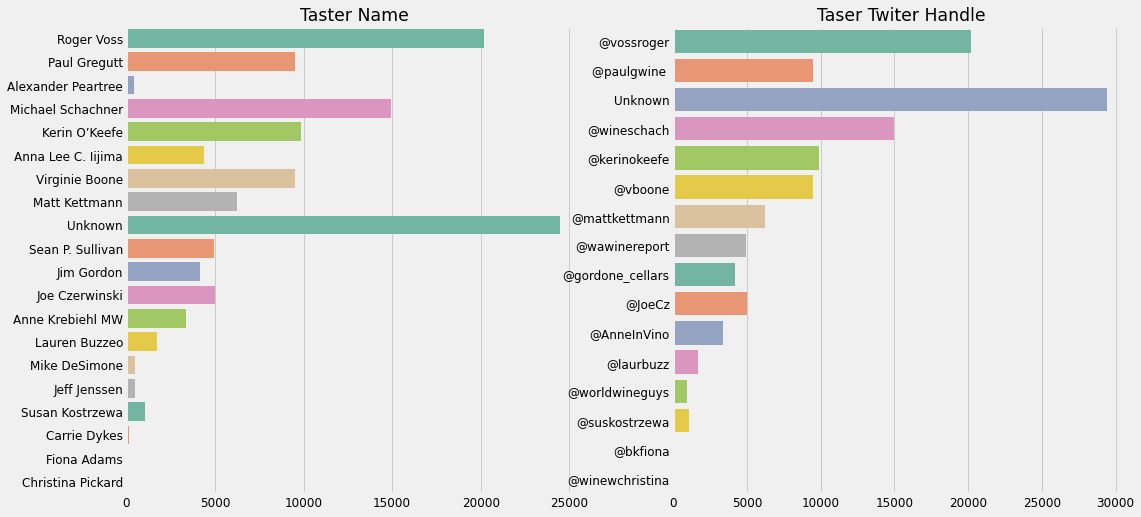

In [17]:
f,ax = plt.subplots(1,2, figsize = (16,8))
ax1,ax2 = ax.flatten()
sns.countplot(y = wines['taster_name'], palette = 'Set2', ax =ax1)
ax1.set_title('Taster Name')
ax1.set_xlabel('')
ax1.set_ylabel('')
sns.countplot(y = wines['taster_twitter_handle'], palette = 'Set2', ax =ax2)
ax2.set_title('Taser Twiter Handle')
ax2.set_xlabel('')
ax2.set_ylabel('');

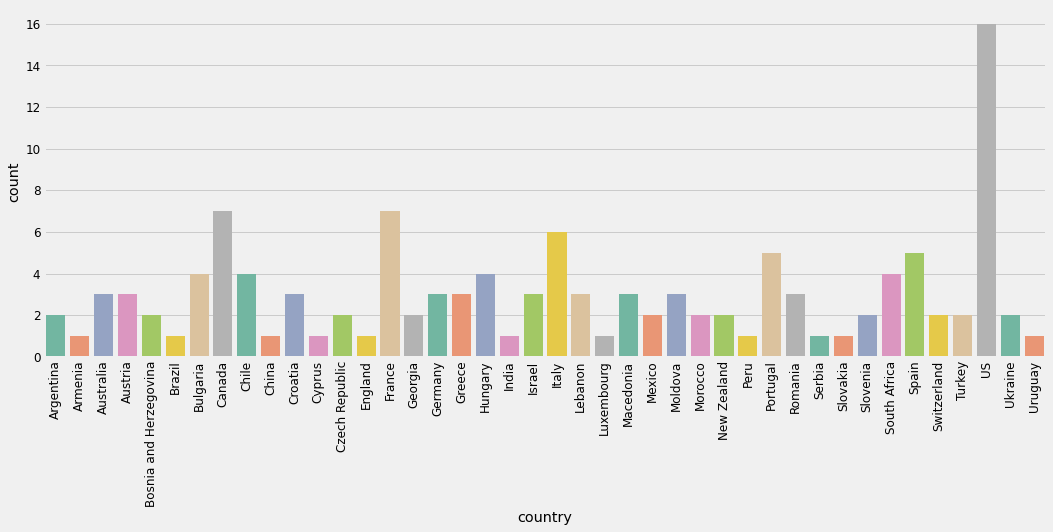

In [21]:
plt.figure(figsize = (16,6))
cnt = wines.groupby(['country','taster_name',]).count().reset_index()
sns.countplot(x = cnt['country'], palette='Set2')
plt.xticks(rotation = 90);

## Description

(-0.5, 399.5, 199.5, -0.5)

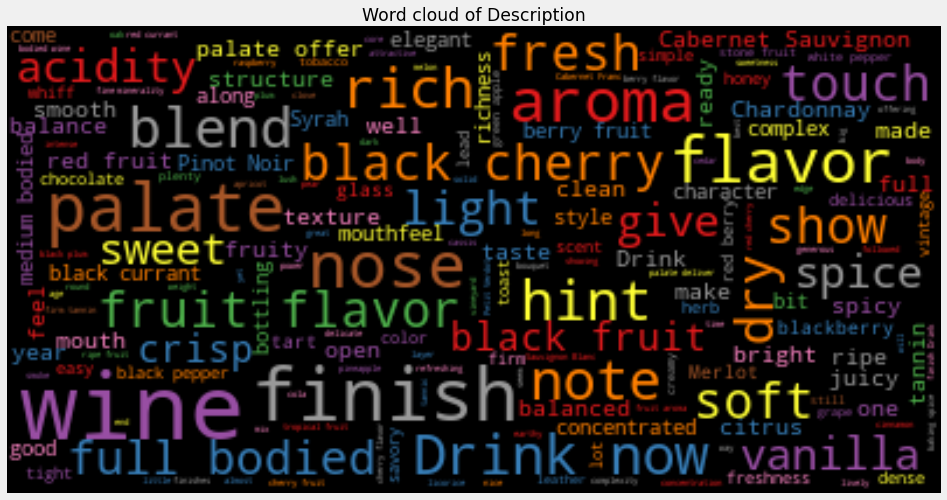

In [26]:
plt.figure(figsize= (16,8))
plt.title('Word cloud of Description')
wc = WordCloud(max_words=1000,max_font_size=40,background_color='black', stopwords = STOPWORDS,colormap='Set1')
wc.generate(' '.join(wines['description']))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')